11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: 60000
Test samples: 10000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.8344 - loss: 0.5344 - val_accuracy: 0.9786 - val_loss: 0.0689
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9793 - loss: 0.0693 - val_accuracy: 0.9845 - val_loss: 0.0461
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.9860 - loss: 0.0444 - val_accuracy: 0.9860 - val_loss: 0.0435
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9884 - loss: 0.0367 - val_accuracy: 0.9868 - val_loss: 0.0396
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9892 - val_loss: 0.0370
313/313 - 2s - 5ms/step - accuracy: 0.9892 - loss: 0.0370

Test accuracy: 0.99


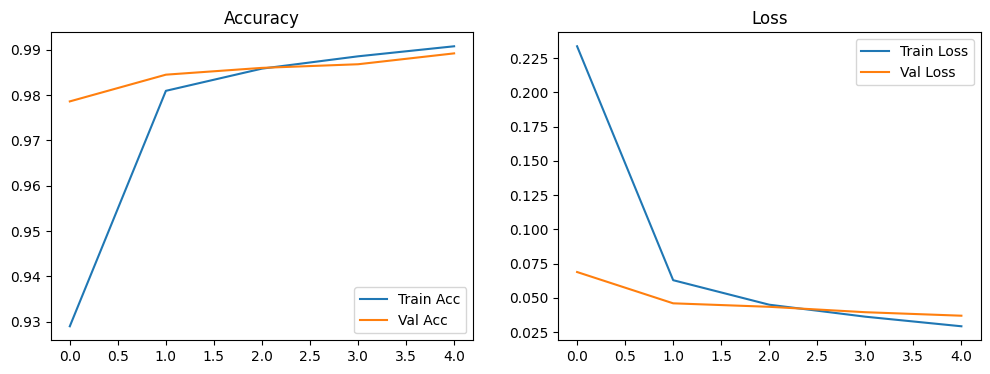

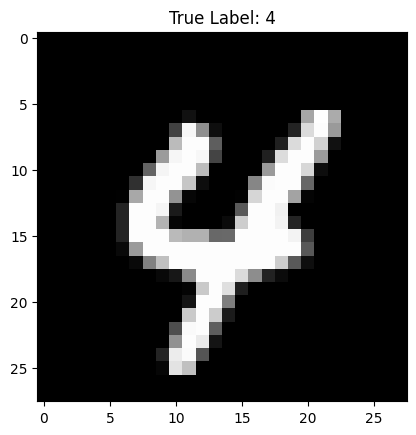

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Label: 4

Analysis:
- The CNN model achieves high accuracy on MNIST digit classification.
- You can tune layers, epochs, and try on other datasets (CIFAR-10, Fashion-MNIST).
- For real-world tasks, use larger datasets and deeper models.



In [1]:
# ================================
# Image Classification with CNN - MNIST Dataset
# Internship Task 3
# ================================

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 2: Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

# Step 3: Preprocess Data
# Normalize and reshape
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, -1)  # shape: (samples, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)

# Step 4: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test), batch_size=128)

# Step 6: Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# Step 7: Plot Training History
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Step 8: Prediction Example
idx = np.random.randint(0, X_test.shape[0])
img = X_test[idx].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(f"True Label: {y_test[idx]}")
plt.show()
pred = model.predict(np.expand_dims(X_test[idx], axis=0))
print("Predicted Label:", np.argmax(pred))

# Step 9: Analysis
print("""
Analysis:
- The CNN model achieves high accuracy on MNIST digit classification.
- You can tune layers, epochs, and try on other datasets (CIFAR-10, Fashion-MNIST).
- For real-world tasks, use larger datasets and deeper models.
""")